In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
import datetime as dt

In [2]:
customer = pd.read_csv('Customer.csv')
product = pd.read_csv('prod_cat_info.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [4]:
product.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [5]:
transactions.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


In [6]:
#1)1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
#keep all customers who have done transactions with us and select the join type accordingly.

product.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)
Customer_final = transactions.merge(customer,left_on='cust_id',right_on='customer_Id',how='inner').merge(product, on=['prod_cat_code','prod_subcat_code'],how='inner' )

In [7]:
# 2.1) Get the column names and their corresponding data types
Customer_final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
prod_cat             object
prod_subcat          object
dtype: object

In [8]:
#2.2) Top/Bottom 10 observations

Customer_final.head(10)


,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,270351,26-09-1981,M,5.0,Clothing,Women
2,18505840838,271509,16-12-2013,1,1,3,1229,387.135,4074.135,Flagship store,271509,08-06-1981,M,3.0,Clothing,Women
3,92814475704,267750,16-08-2013,1,1,-4,-284,119.280,-1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
4,92814475704,267750,7/8/2013,1,1,4,284,119.280,1255.280,Flagship store,267750,13-10-1986,M,1.0,Clothing,Women
5,4737317330,269345,29-07-2011,1,1,5,1141,599.025,6304.025,MBR,269345,26-06-1970,F,10.0,Clothing,Women
6,44425889101,274987,18-03-2012,1,1,4,897,376.740,3964.740,Flagship store,274987,08-10-1983,M,2.0,Clothing,Women
7,90501340928,271817,19-02-2012,1,1,1,1122,117.810,1239.810,TeleShop,271817,24-12-1989,M,8.0,Clothing,Women
8,99335419136,268755,13-12-2012,1,1,3,1181,372.015,3915.015,e-Shop,268755,15-07-1984,F,8.0,Clothing,Women
9,35030444164,268129,18-11-2011,1,1,5,1047,549.675,5784.675,MBR,268129,07-08-1982,F,9.0,Clothing,Women


In [9]:
Customer_final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,customer_Id,DOB,Gender,city_code,prod_cat,prod_subcat
23043,3387244829,269114,15-07-2011,4,4,1,388,40.740,428.740,e-Shop,269114,22-01-1989,F,5.0,Bags,Women
23044,76906459516,267940,15-06-2011,4,4,2,1263,265.230,2791.230,Flagship store,267940,09-06-1979,M,9.0,Bags,Women
23045,73549617163,271334,5/7/2011,4,4,5,263,138.075,1453.075,e-Shop,271334,08-12-1983,F,10.0,Bags,Women
23046,75339646315,274827,2/5/2011,4,4,4,1381,580.020,6104.020,e-Shop,274827,27-12-1988,F,8.0,Bags,Women
23047,6650926717,268110,5/4/2011,4,4,4,1036,435.120,4579.120,MBR,268110,06-03-1976,M,2.0,Bags,Women
23048,7173864364,271157,9/4/2011,4,4,5,788,413.700,4353.700,Flagship store,271157,15-10-1973,F,6.0,Bags,Women
23049,5618131425,272010,3/3/2011,4,4,2,1150,241.500,2541.500,MBR,272010,22-12-1972,F,5.0,Bags,Women
23050,18727956164,267161,23-02-2011,4,4,5,668,350.700,3690.700,e-Shop,267161,08-05-1981,M,9.0,Bags,Women
23051,60416814232,273281,18-02-2011,4,4,4,202,84.840,892.840,Flagship store,273281,14-12-1988,F,9.0,Bags,Women
23052,83245680995,273723,26-01-2011,4,4,4,1477,620.340,6528.340,e-Shop,273723,21-01-1984,F,4.0,Bags,Women


In [10]:
#2.3)  “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)
Customer_final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


In [35]:
#2.4)Frequency tables for all the categorical variables
for i in Customer_final.select_dtypes('object'):
    print(f'Frequency table for {i}')
    display(Customer_final[i].value_counts().to_frame())

Frequency table for Store_type


,Store_type
e-Shop,9311
MBR,4661
Flagship store,4577
TeleShop,4504


Frequency table for Gender


,Gender
M,11811
F,11233


Frequency table for prod_cat


,prod_cat
Books,6069
Electronics,4898
Home and kitchen,4129
Footwear,2999
Clothing,2960
Bags,1998


Frequency table for prod_subcat


,prod_subcat
Women,3048
Mens,2912
Kids,1997
Tools,1062
Fiction,1043
Kitchen,1037
Children,1035
Mobiles,1031
Comics,1031
Bath,1023


In [11]:
Customer_final['DOB'] = pd.to_datetime(Customer_final['DOB'])
Customer_final['tran_date'] = pd.to_datetime(Customer_final['tran_date'])

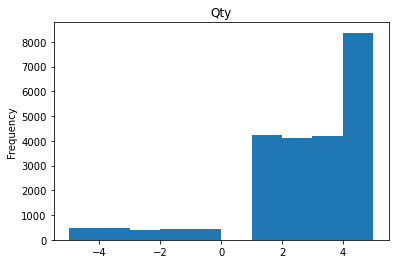

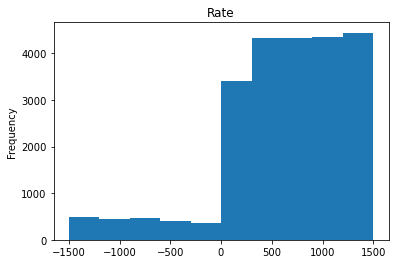

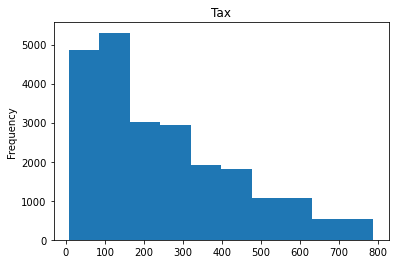

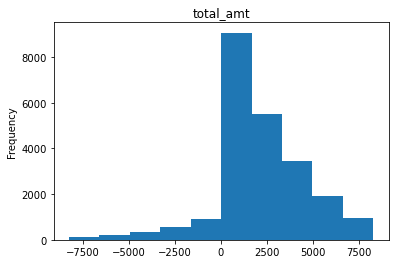

In [36]:
#3) Generate histograms for all continuous variables and frequency bars for categorical variables.

cont = Customer_final[['Qty', 'Rate', 'Tax', 'total_amt']]
# Histograms
for i in cont.columns:
    cont[i].plot(kind='hist')
    plt.title(i) 
    plt.show()


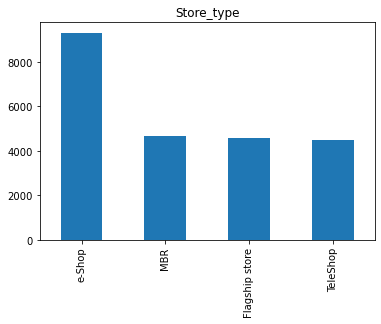

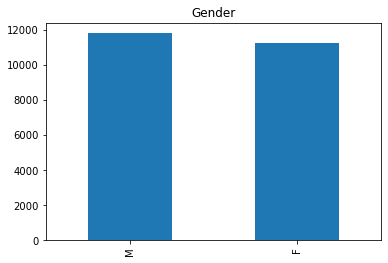

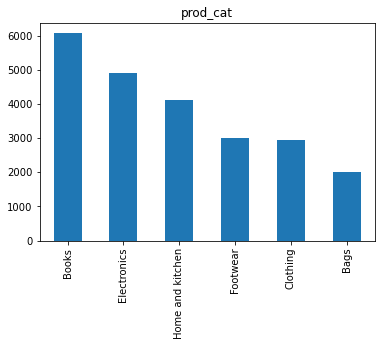

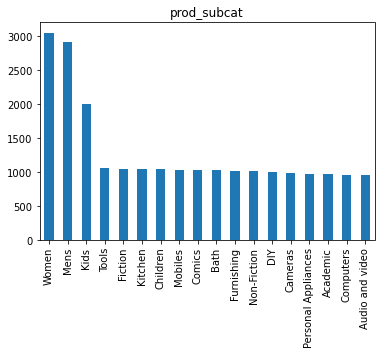

In [13]:
# Bar charts
cat = Customer_final.select_dtypes('object')
for i in cat.columns:
    cat[i].value_counts().plot(kind= 'bar')
    plt.title(i)
    plt.show()

In [14]:
#4.a) Time period of the available transaction data

Customer_final['tran_date'].max()-Customer_final['tran_date'].min()


Timedelta('1430 days 00:00:00')

In [15]:
#4.b) Count of transactions where the total amount of transaction was negative
(Customer_final['total_amt']<0).sum()

2177

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


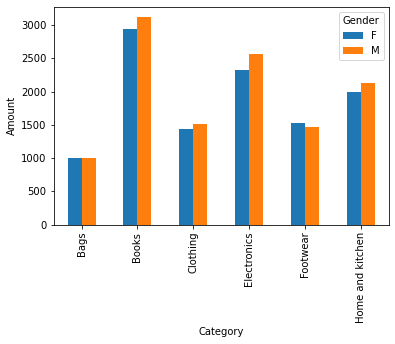

In [41]:
#5) Analyze which product categories are more popular among females vs male customers
a=pd.pivot_table(data=Customer_final,index= 'prod_cat', columns= 'Gender', values= 'total_amt', aggfunc= 'count')
display(a)
a.plot(kind='bar',xlabel='Category',ylabel='Amount')
plt.show()

In [17]:
#6) Which City code has the maximum customers and what was the percentage of customers from that city?
a = Customer_final.groupby(by='city_code')['transaction_id'].count().sort_values(ascending=False).head(1)
b= a/ Customer_final['cust_id'].count()*100
pd.DataFrame(data=b.values,index=b.index ,columns=['Percentage'])

,Percentage
city_code,
4.0,10.506225


In [18]:
#7) Which store type sells the maximum products by value and by quantity?
Customer_final.groupby(by='Store_type')['Rate','Qty'].sum().sort_values(by=['Rate','Qty'],ascending=False).head(1)

,Rate,Qty
Store_type,,
e-Shop,5941001,22763


In [19]:
#8) What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?
pd.pivot_table(data=Customer_final, index='prod_cat',columns='Store_type', values='total_amt',aggfunc='sum').loc[['Electronics','Clothing'],'Flagship store']

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

In [20]:
#9) What was the total amount earned from "Male" customers under the "Electronics" category?
pd.pivot_table(data=Customer_final, index='Gender', columns='prod_cat',values = 'total_amt',aggfunc='sum').loc['M','Electronics']

5703109.425

In [21]:
#10)How many customers have more than 10 unique transactions, after removing all transactions
#which have any negative amounts?

cust = Customer_final.loc[Customer_final["total_amt"]>0,:]
cust = pd.pivot_table(data=cust, index='cust_id',values='total_amt', aggfunc='count').sort_values(by='total_amt',ascending=False)
cust[cust['total_amt']>10].count()

total_amt    6
dtype: int64

In [22]:
#11)

Customer_final['Age']= dt.datetime.today().year-Customer_final['DOB'].dt.year

In [42]:
#a) What was the total amount spent for “Electronics” and “Books” product categories?
Age_group=Customer_final[(Customer_final['Age']>=25) & (Customer_final['Age']<35)]
Age_group.groupby(by='prod_cat').sum()['total_amt'][['Books','Electronics']].sum()

4939932.335

In [ ]:
#b) What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

Age_group[(Age_group['tran_date']>='2014-01-01') & (Age_group['tran_date']<='2014-03-01')]
Age_group['total_amt'].sum()

10554655.02